In [40]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

#Load dataset
bcw = datasets.load_breast_cancer()

In [41]:
# print the names of the features
print("Features:", bcw.feature_names, sep="\n")

# print the label type
print("\nLabels:", bcw.target_names)

# print data(feature)shape
print("\nNo. of examples and features in the dataset are:", bcw.data.shape)
print(bcw.data)

Features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Labels: ['malignant' 'benign']

No. of examples and features in the dataset are: (569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7

In [42]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(bcw.data, bcw.target, test_size = 0.5, random_state = 2)

In [43]:
#Create a Decision Tree Classifier (using Gini)
dtc = DecisionTreeClassifier(criterion = "gini",max_leaf_nodes=124,random_state=124)

#Train the model using the training sets
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=124,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=124, splitter='best')

In [44]:
# Predict the classes of test data
pred = dtc.predict(X_test)
print("prediction:",pred)

#print(test_pred.dtype)

prediction: [1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1
 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1
 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0]


In [45]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
Accuracy = metrics.accuracy_score(Y_test, pred)
print("Accuracy:",Accuracy)

Accuracy: 0.9017543859649123


In [46]:
from sklearn.tree import export_graphviz
export_graphviz(dtc,out_file='bcw_tree.dot',feature_names=list(bcw.feature_names),
               class_names=list(bcw.target_names), filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'bcw_tree.dot', '-o', 'bcw_tree.png', '-Gdpi=600'])

0

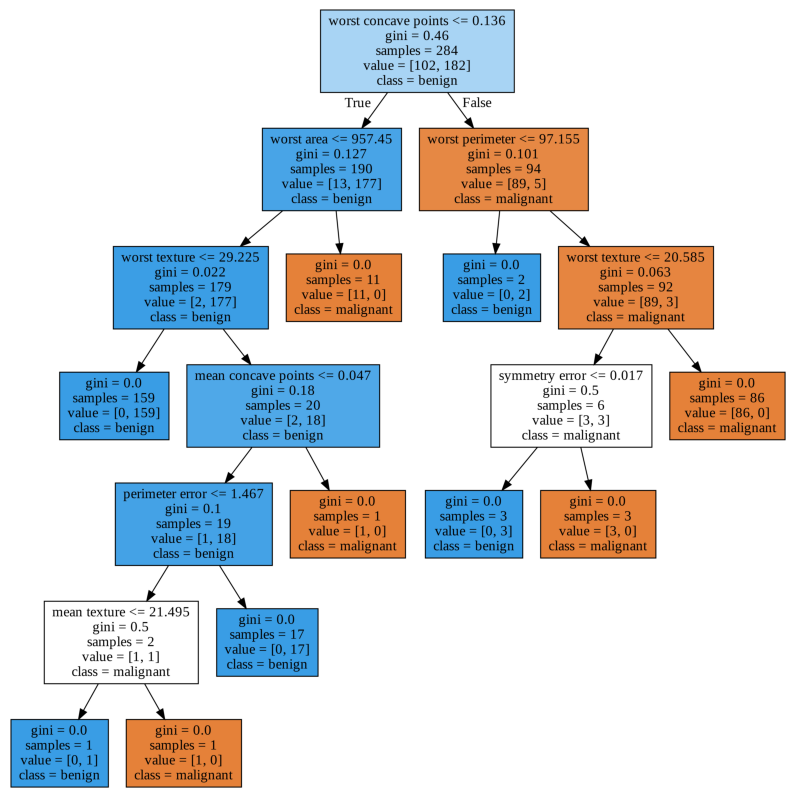

In [47]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('bcw_tree.png'))
plt.axis('off')
plt.show()